In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [ ]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [ ]:
nse = pd.read_excel('Final Dataset1.xlsx', sheet_name='NIFTY')
nse

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2017-04-03,8028.55,8057.40,8014.40,8053.15,836437630,19267.02
1,2017-04-05,8077.85,8100.70,8045.75,8095.10,1073057297,24808.88
2,2017-04-06,8081.50,8096.25,8056.35,8092.10,944826819,22343.23
3,2017-04-07,8064.05,8100.50,8035.00,8045.35,988922713,23637.86
4,2017-04-10,8070.45,8077.95,8038.30,8052.10,781737603,19158.08
...,...,...,...,...,...,...,...
1225,2022-03-25,14763.90,14768.30,14590.45,14651.70,1396675558,48378.72
1226,2022-03-28,14686.25,14694.85,14515.65,14675.85,1547370762,50067.99
1227,2022-03-29,14744.05,14773.15,14689.60,14761.90,1722624126,48744.91
1228,2022-03-30,14880.70,14924.75,14823.55,14896.90,2148589897,63379.17


In [ ]:
nse.drop(nse.columns[[6]], axis=1, inplace=True)
nse.head()

,Date,Open,High,Low,Close,Shares Traded
0,2017-04-03,8028.55,8057.40,8014.40,8053.15,836437630
1,2017-04-05,8077.85,8100.70,8045.75,8095.10,1073057297
2,2017-04-06,8081.50,8096.25,8056.35,8092.10,944826819
3,2017-04-07,8064.05,8100.50,8035.00,8045.35,988922713
4,2017-04-10,8070.45,8077.95,8038.30,8052.10,781737603


In [ ]:
nse = nse.rename(columns={'Shares Traded': 'Volume'}, index={'ONE': 'Row_1'})
nse.head()

,Date,Open,High,Low,Close,Volume
0,2017-04-03,8028.55,8057.40,8014.40,8053.15,836437630
1,2017-04-05,8077.85,8100.70,8045.75,8095.10,1073057297
2,2017-04-06,8081.50,8096.25,8056.35,8092.10,944826819
3,2017-04-07,8064.05,8100.50,8035.00,8045.35,988922713
4,2017-04-10,8070.45,8077.95,8038.30,8052.10,781737603


In [ ]:
#nse.set_index(pd.DatetimeIndex(nse['Date']), inplace=True)
df = nse[['Date','Close']]
df

,Date,Close
0,2017-04-03,8053.15
1,2017-04-05,8095.10
2,2017-04-06,8092.10
3,2017-04-07,8045.35
4,2017-04-10,8052.10
...,...,...
1225,2022-03-25,14651.70
1226,2022-03-28,14675.85
1227,2022-03-29,14761.90
1228,2022-03-30,14896.90


In [ ]:
df.isna().values.any()

False

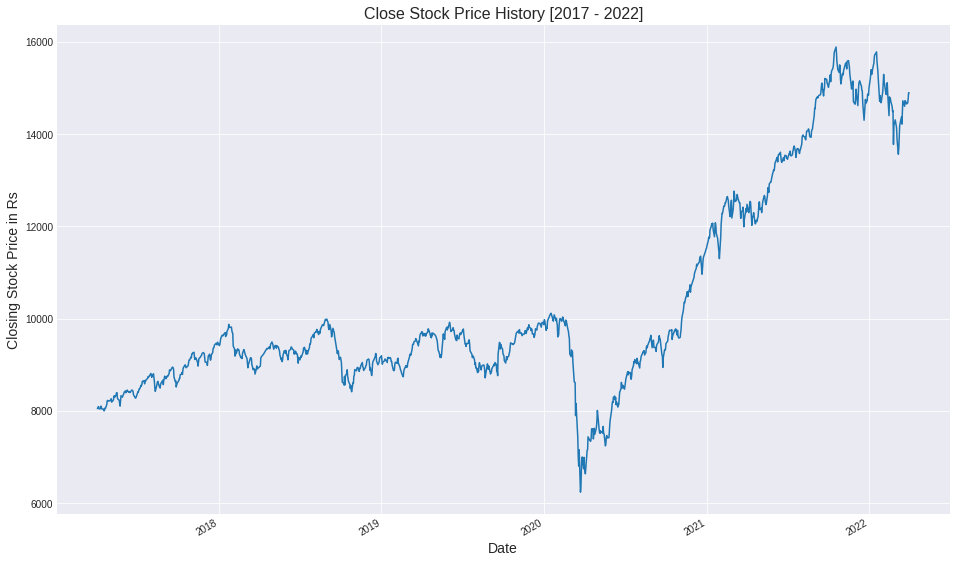

In [ ]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2017 - 2022]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in Rs', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, test_size=0.20)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [ ]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  4.803769800179685
Intercept:  7394.621358047896


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


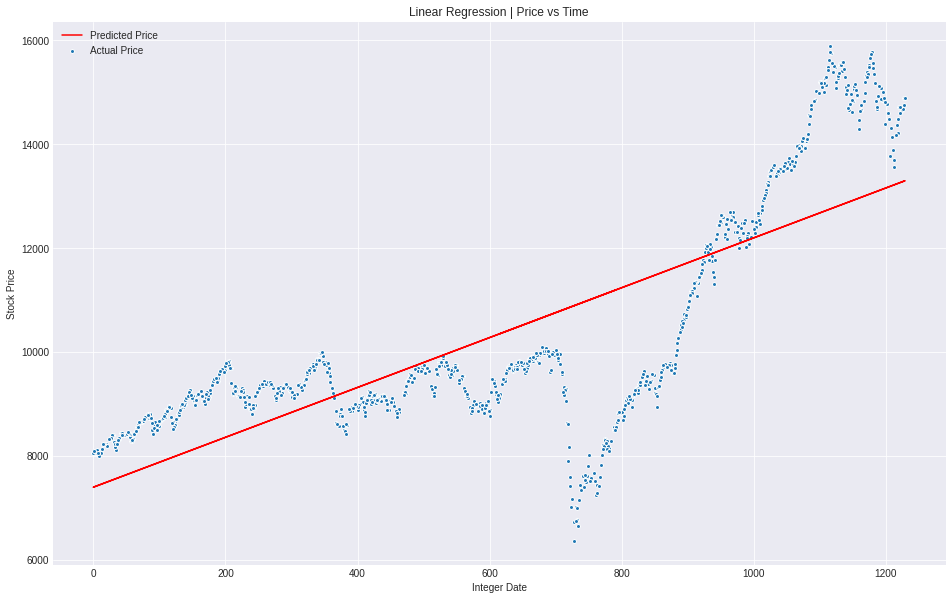

In [ ]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,Date,Close,Prediction
0,2017-04-03,8053.15,7394.621358
1,2017-04-05,8095.10,7399.425128
2,2017-04-06,8092.10,7404.228898
3,2017-04-07,8045.35,7409.032667
4,2017-04-10,8052.10,7413.836437
...,...,...,...
1225,2022-03-25,14651.70,13279.239363
1226,2022-03-28,14675.85,13284.043133
1227,2022-03-29,14761.90,13288.846903
1228,2022-03-30,14896.90,13293.650673


In [ ]:
# Get number of rows in data set for random sample
df.shape

(1230, 3)

In [ ]:
# Generate 25 random numbers
randints = np.random.randint(1230, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [ ]:
df_sample.head()

,Date,Close,Prediction
26,2017-05-12,8299.20,7519.519373
50,2017-06-15,8400.20,7634.809848
136,2017-10-19,8937.65,8047.934051
155,2017-11-16,9065.00,8139.205677
191,2018-01-08,9639.25,8312.141390


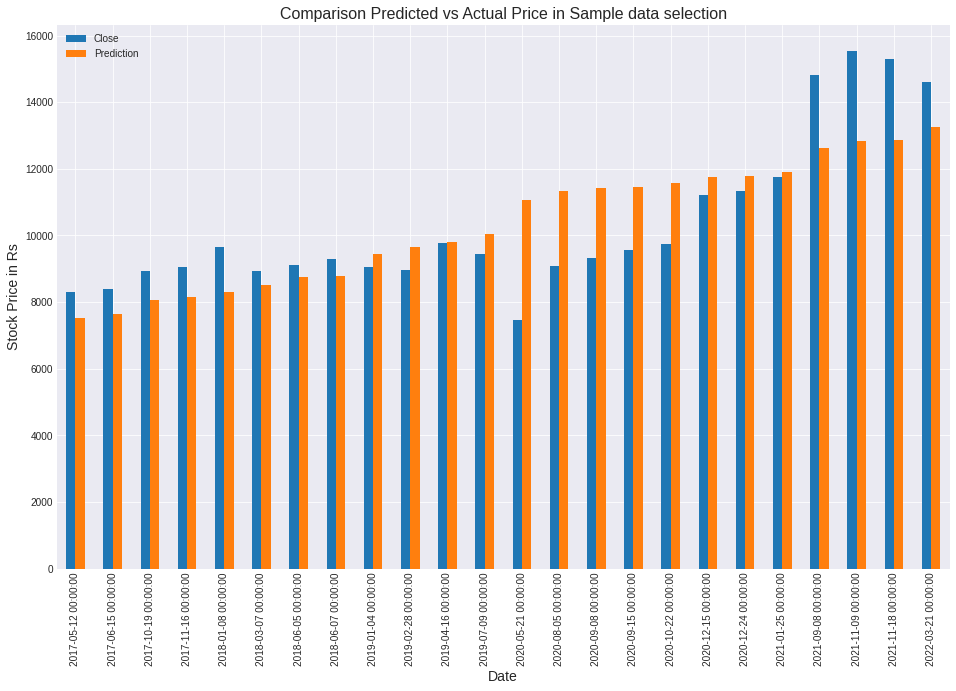

In [ ]:
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in Rs', fontsize=14)

# Show plot
plt.show()

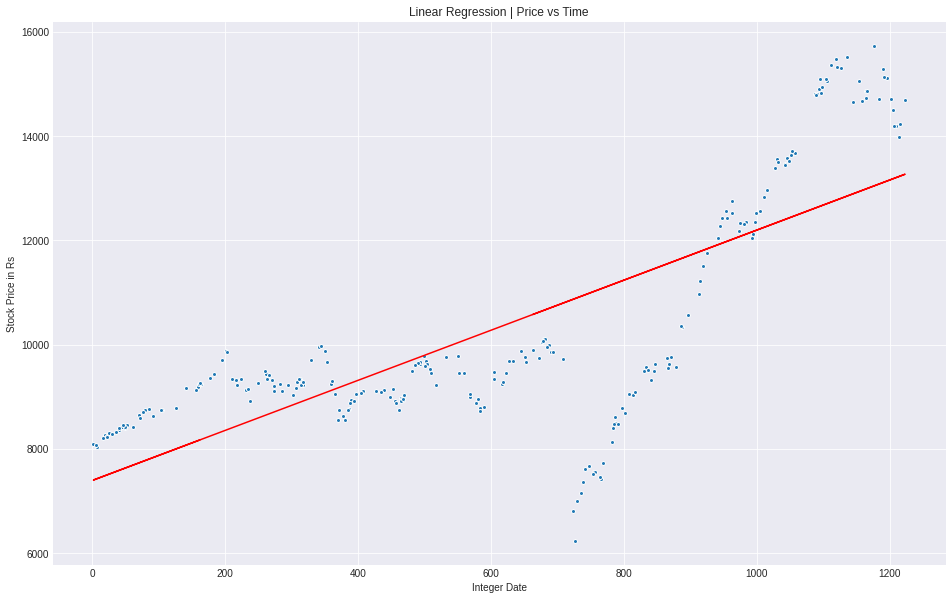

In [ ]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in Rs')

plt.show()

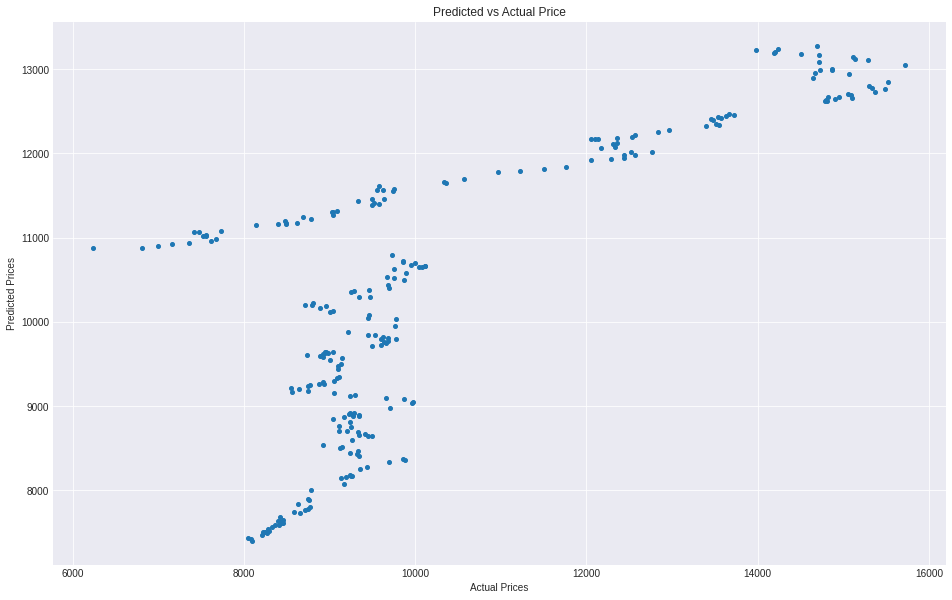

In [ ]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


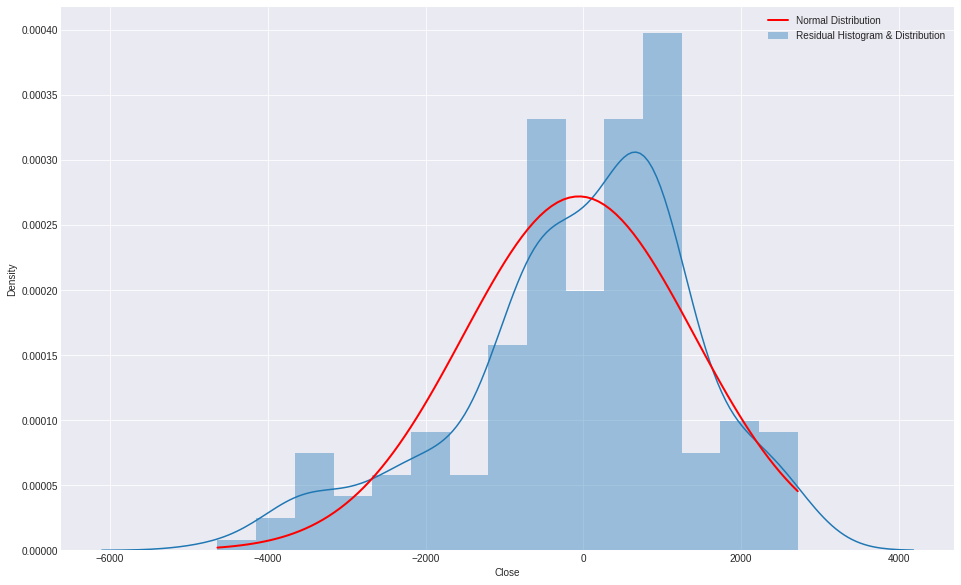

In [ ]:
# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [ ]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [ ]:
# Statistical summary of test data
df['Close'].describe()

count     1230.000000
mean     10334.977114
std       2220.298341
min       6243.000000
25%       8974.212500
50%       9444.150000
75%      11516.137500
max      15886.150000
Name: Close, dtype: float64

In [ ]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1146.8294040527526
Mean Squared Error: 2155151.243633057
Root Mean Squared Error: 1468.043338472355


In [ ]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.5766425941686693


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.5772989572930928